In [28]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np 
import missingno as msno
import math
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
tc = pd.read_csv("titanic-passengers.csv",sep = ';',header = 0 )
tc

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [3]:
tc.info()
tc.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
tc.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
tc = tc.fillna(value = {"Age":np.ceil(tc["Age"].mean())}) #missing age values are imputed with the mean
tc["Cabin"].value_counts()# G6 is the most frequent but because huge no of data are missing we'll create new cabin named H95
tc = tc.fillna(value = {"Cabin":"H95"}) #missing Cabin values are imputed with the most freq
tc[["Cabin","Age"]].head()

,Cabin,Age
0,H95,28.0
1,F G73,25.0
2,H95,20.0
3,H95,29.0
4,B71,31.0


In [6]:
tc.dropna(subset=['Embarked',"Name"],inplace=True)
tc

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,H95,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,H95,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,H95,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,H95,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,H95,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,H95,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,30.0,0,0,349215,7.8958,H95,S


In [7]:
le = LabelEncoder()
tc["Sex"]= le.fit_transform(tc["Sex"])
#tc["Survived"]= le.fit_transform(tc["Survived"])
tc["Cabin"] = le.fit_transform(tc["Cabin"])
tc["Embarked"]=le.fit_transform(tc["Embarked"])
tc["Fare"] = tc["Fare"].astype(int)
tc

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13,145,2
1,76,No,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7,139,2
2,641,No,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7,145,2
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21,145,2
4,672,No,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52,37,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30,145,0
887,61,No,3,"Sirayanian, Mr. Orsen",1,22.0,0,0,2669,7,145,0
888,535,No,3,"Cacic, Miss. Marija",0,30.0,0,0,315084,8,145,2
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,30.0,0,0,349215,7,145,2


In [8]:
tc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    object 
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    int32  
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    int32  
 10  Cabin        889 non-null    int32  
 11  Embarked     889 non-null    int32  
dtypes: float64(1), int32(4), int64(4), object(3)
memory usage: 76.4+ KB


In [9]:
tc.drop(["Name","Ticket"],axis = 1)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,343,No,2,1,28.0,0,0,13,145,2
1,76,No,3,1,25.0,0,0,7,139,2
2,641,No,3,1,20.0,0,0,7,145,2
3,568,No,3,0,29.0,0,4,21,145,2
4,672,No,1,1,31.0,1,0,52,37,2
...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,0,14.0,1,0,30,145,0
887,61,No,3,1,22.0,0,0,7,145,0
888,535,No,3,0,30.0,0,0,8,145,2
889,102,No,3,1,30.0,0,0,7,145,2


In [10]:
def title(x):
    if ',' in x and '.' in x :
        return x[x.index(',')+1:x.index('.')]
tc['Title']=tc["Name"]
tc['Title']=tc["Title"].apply(title)
tc

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,343,No,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13,145,2,Mr
1,76,No,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7,139,2,Mr
2,641,No,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7,145,2,Mr
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21,145,2,Mrs
4,672,No,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52,37,2,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30,145,0,Mrs
887,61,No,3,"Sirayanian, Mr. Orsen",1,22.0,0,0,2669,7,145,0,Mr
888,535,No,3,"Cacic, Miss. Marija",0,30.0,0,0,315084,8,145,2,Miss
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,30.0,0,0,349215,7,145,2,Mr


In [11]:
Title_Dictionary = {
"Capt":       "Officer",
"Col":        "Officer",
"Major":      "Officer",
"Dr":         "Officer",
"Rev":        "Officer",
"Jonkheer":   "Royalty",
"Don":        "Royalty",
"Sir" :       "Royalty",
"Lady" :      "Royalty",
"the Countess" : "Royalty",
"Dona":       "Royalty",
"Mme":        "Miss",
"Mlle":       "Miss",
"Miss" :      "Miss",
"Ms":         "Mrs",
"Mr" :        "Mrs",
"Mrs" :       "Mrs",
"Master" :    "Master"
                    }
tc.replace(Title_Dictionary , inplace = True)
tc["Title"]

0         Mr
1         Mr
2         Mr
3        Mrs
4         Mr
       ...  
886      Mrs
887       Mr
888     Miss
889       Mr
890     Miss
Name: Title, Length: 889, dtype: object

In [12]:
tc["FamilySize"] = tc["SibSp"] + tc["Parch"]
tc["FamilySize"]

0      0
1      0
2      0
3      4
4      1
      ..
886    1
887    0
888    0
889    0
890    0
Name: FamilySize, Length: 889, dtype: int64

In [13]:
tc["Survived"]=tc["Survived"].map({"Yes": 1, "No": 0})   #convert survived variable into numerical
tc.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,248740,13,145,2,Mr,0
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,348123,7,139,2,Mr,0
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,350050,7,145,2,Mr,0
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,349909,21,145,2,Mrs,4
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,F.C. 12750,52,37,2,Mr,1
5,105,0,3,"Gustafsson, Mr. Anders Vilhelm",1,37.0,2,0,3101276,7,145,2,Mr,2
6,576,0,3,"Patchett, Mr. George",1,19.0,0,0,358585,14,145,2,Mr,0
7,382,1,3,"Nakid, Miss. Maria (""Mary"")",0,1.0,0,2,2653,15,145,0,Miss,2
8,228,0,3,"Lovell, Mr. John Hall (""Henry"")",1,20.5,0,0,A/5 21173,7,145,2,Mr,0
9,433,1,2,"Louch, Mrs. Charles Alexander (Alice Adelaide ...",0,42.0,1,0,SC/AH 3085,26,145,2,Mrs,1


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [15]:
#features extraction
x = tc[['Age', 'Sex','Fare','FamilySize','Pclass']]
y = tc['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  #splitting data with test size of 25%
logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.83


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

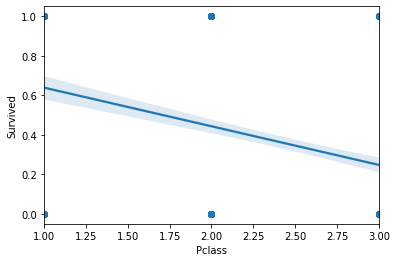

In [16]:
import seaborn as sns
sns.regplot(x='Pclass',y='Survived',data=tc)

'TP:62 ,TN:120 ,FP:13,FN:24'

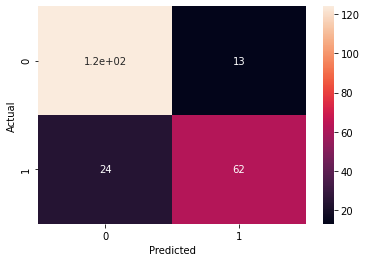

In [17]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)
"""TP:62 ,TN:120 ,FP:13,FN:24"""

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       137
           1       0.83      0.72      0.77        86

    accuracy                           0.83       223
   macro avg       0.83      0.81      0.82       223
weighted avg       0.83      0.83      0.83       223



In [19]:
#tc["Age"][:,1]

In [ ]:
""" AOC-ROC curve , the “Area Under the Curve” (AUC) of “Receiver Characteristic Operator” (ROC)
The Curve helps us visualize how well our machine learning classifier is performing
The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes., we are using different expressions to plot our curve, 1-Sensitivity "Recall"(True positive rate TPR) 2- (FPR False positve rate = 1 - TPR ), 3 -Specificity(TNR True negative rate) , and lastly FNR = 1-TNR """


In [24]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# roc curve for our model
pred_prob = logreg.predict_proba(x_test)
fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# auc scores
auc_score = roc_auc_score(y_test, pred_prob[:,1])
print(auc_score)

0.880750297063317


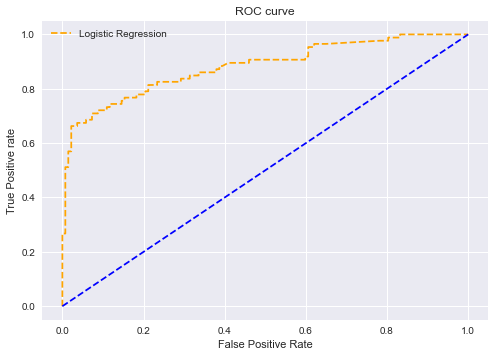

In [26]:
plt.style.use('seaborn')
# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()